In [81]:

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import mean
import plotly.express as px
from sklearn.metrics import silhouette_score

In [38]:
DATA = os.path.abspath('supermercado_noche.csv')
data_csv = pd.read_csv(DATA)
data_csv.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [39]:
data_csv.shape

(2000, 8)

In [40]:
round(data_csv.describe(),2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
min,1.000000e+08,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
25%,1.000005e+08,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
50%,1.000010e+08,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
75%,1.000015e+08,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
max,1.000020e+08,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [41]:
data_analysis = data_csv.drop('ID', axis=1)
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_analysis)

In [99]:
fig = px.box(data_analysis, y='Income')
fig.show()

In [124]:
distortions = []
K = range(1,10)
kmeans = [KMeans(n_clusters=i, n_init=10).fit(data_scaler) for i in K]
score = [kmeans[i].score(data_scaler) for i in range(len(kmeans))]
distortions = [kmeans[i].inertia_ for i in range(len(kmeans))]

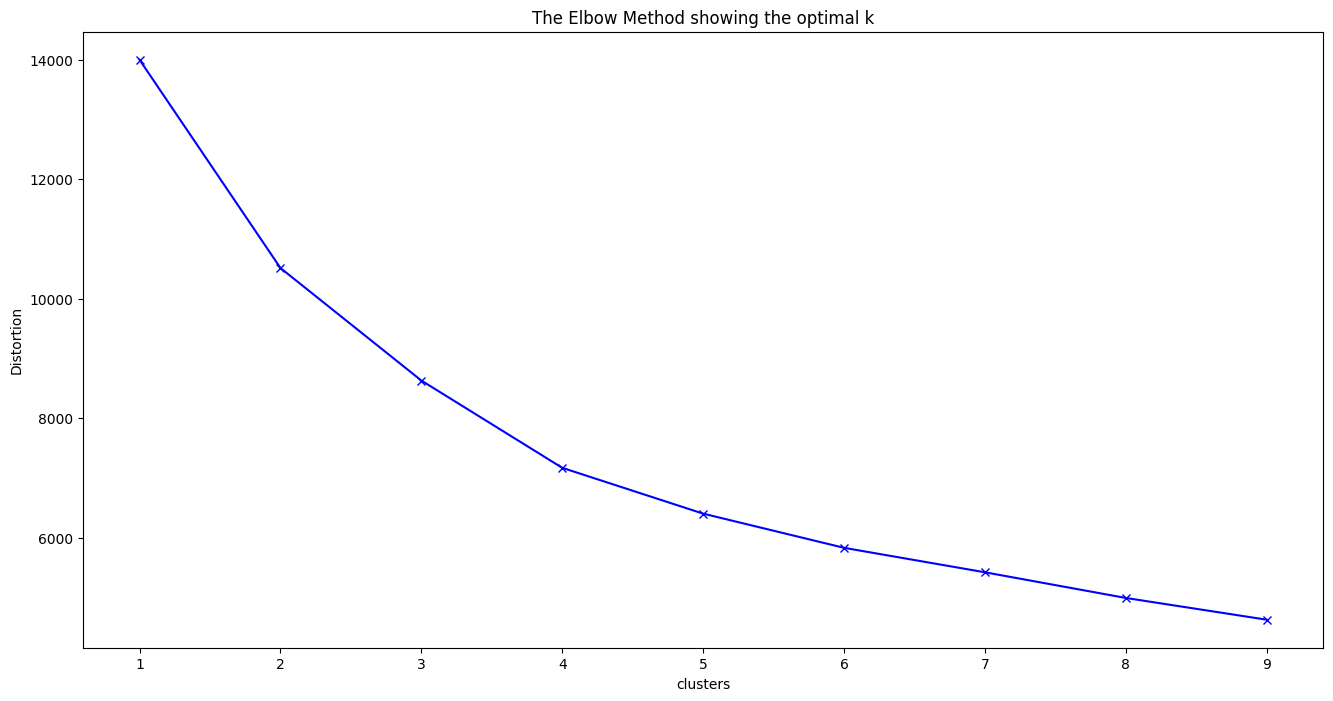

In [127]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='Distortion')
plt.xlabel('clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
# plt.legend()
plt.show()

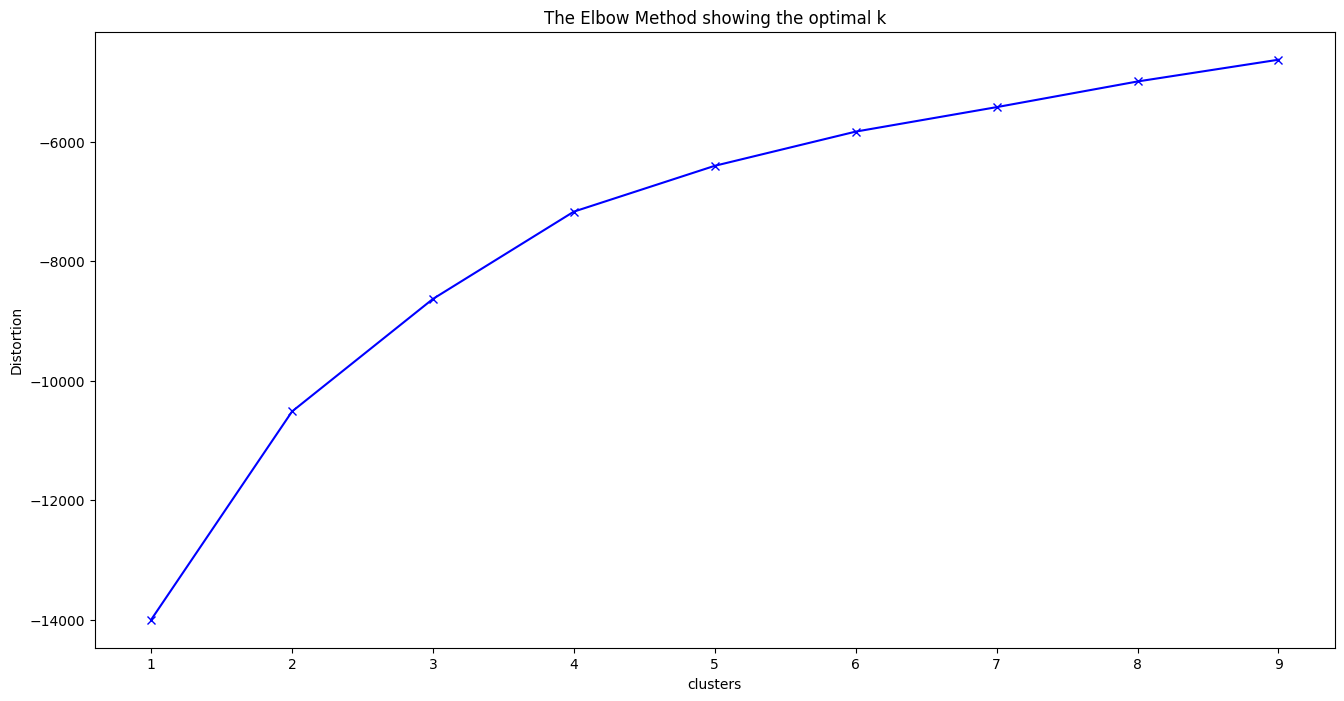

In [128]:
plt.figure(figsize=(16,8))
plt.plot(K, score, 'bx-', label='Distortion')
plt.xlabel('clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
# plt.legend()
plt.show()

In [46]:
correlation = data_csv.corr()
correlation

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<Axes: >

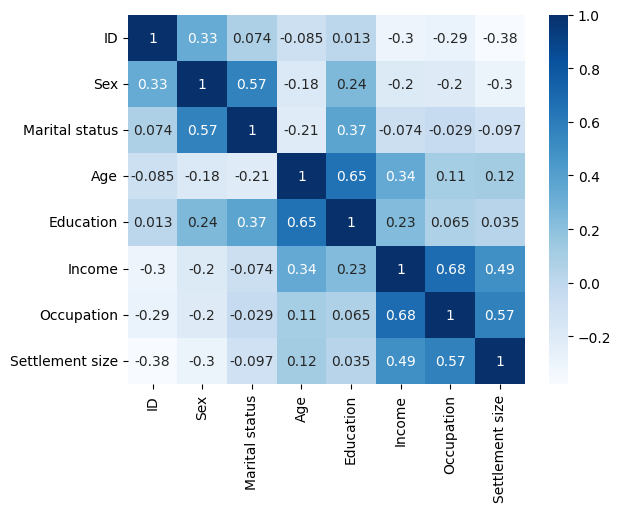

In [47]:
sns.heatmap(correlation, cmap='Blues', annot=True)

In [130]:
kmeanmodel = KMeans(n_clusters=4, n_init=10, max_iter=100)
kmeanmodel.fit(data_analysis)

KMeans(max_iter=100, n_clusters=4, n_init=10)

In [131]:
round(silhouette_score(data_analysis, kmeanmodel.labels_),2)

0.54

In [132]:
data_analysis['kmean'] = kmeanmodel.predict(data_analysis)

Text(0.5, 1.0, 'Sex x Marital status')

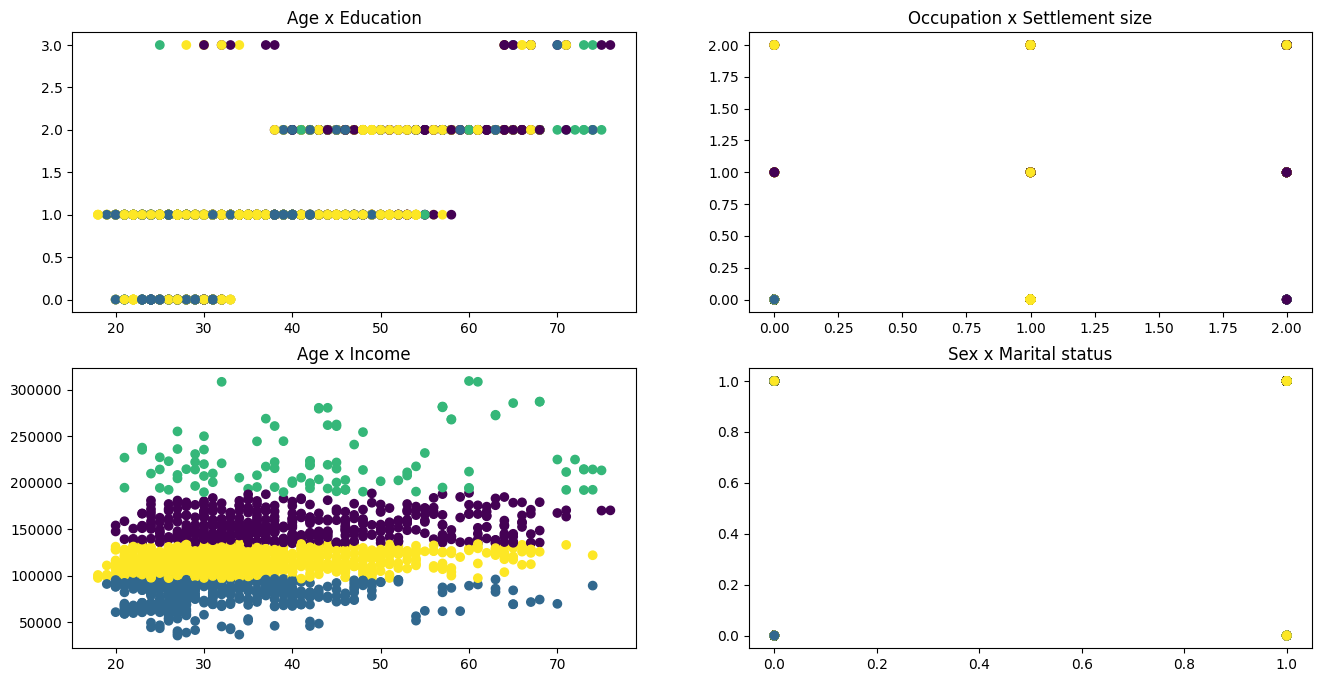

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].scatter(data_analysis['Age'], data_analysis['Education'], c=data_analysis['kmean'], cmap='viridis')
axes[1,0].scatter(data_analysis['Age'], data_analysis['Income'], c=data_analysis['kmean'], cmap='viridis')
axes[0,1].scatter(data_analysis['Occupation'], data_analysis['Settlement size'], c=data_analysis['kmean'], cmap='viridis')
axes[1,1].scatter(data_analysis['Sex'], data_analysis['Marital status'], c=data_analysis['kmean'], cmap='viridis')
axes[0,0].set_title('Age x Education')
axes[1,0].set_title('Age x Income')
axes[0,1].set_title('Occupation x Settlement size')
axes[1,1].set_title('Sex x Marital status')

Text(0.5, 1.0, 'Sex x Income')

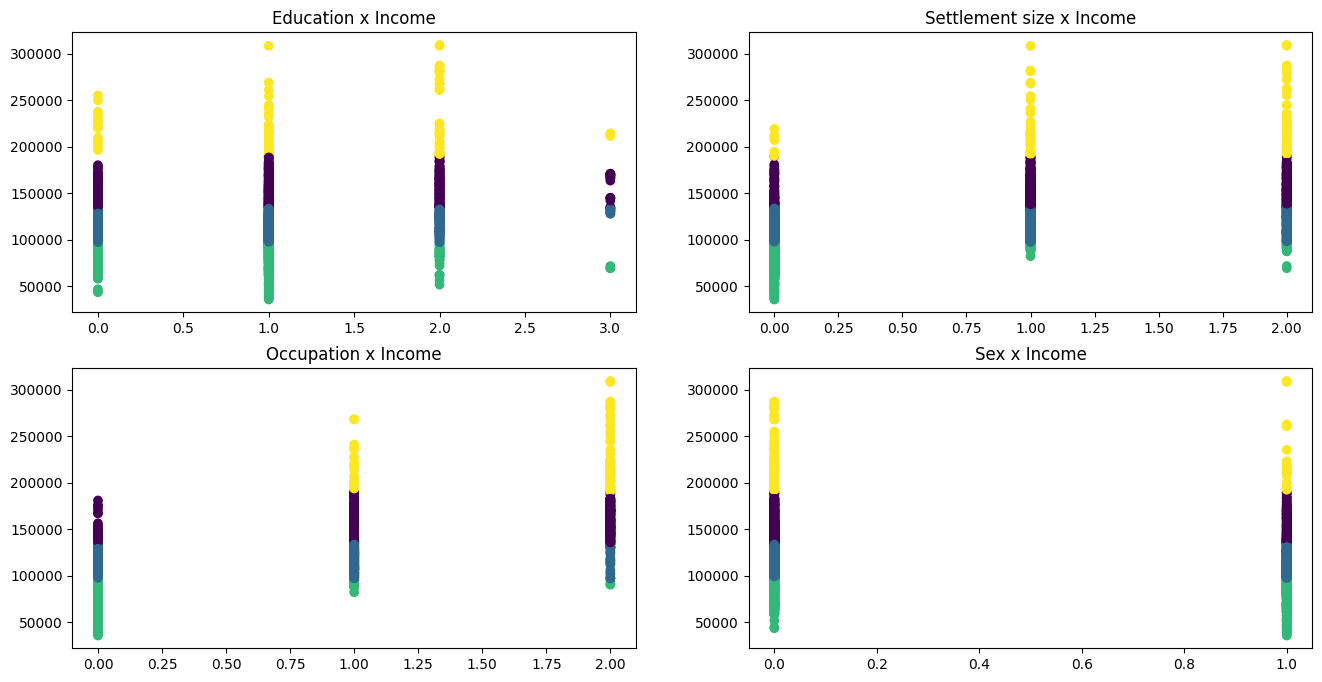

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].scatter(data_analysis['Education'], data_analysis['Income'], c=data_analysis['kmean'], cmap='viridis')
axes[1,0].scatter(data_analysis['Occupation'], data_analysis['Income'], c=data_analysis['kmean'], cmap='viridis')
axes[0,1].scatter(data_analysis['Settlement size'], data_analysis['Income'], c=data_analysis['kmean'], cmap='viridis')
axes[1,1].scatter(data_analysis['Sex'], data_analysis['Income'], c=data_analysis['kmean'], cmap='viridis')
axes[0,0].set_title('Education x Income')
axes[1,0].set_title('Occupation x Income')
axes[0,1].set_title('Settlement size x Income')
axes[1,1].set_title('Sex x Income')

In [134]:
fig = px.scatter(data_analysis, x='Age', y='Income', color=data_analysis['kmean'])
fig.show()

In [143]:
quantity = data_analysis.groupby('kmean').size()
quantity

kmean
0    457
1    483
2    105
3    955
dtype: int64

In [189]:
prove = data_analysis.groupby('kmean')

prove.describe().to_excel('prove_descrip.xlsx')